<a href="https://colab.research.google.com/github/nishitjain/BloggingNotebooks/blob/main/E2E_Sentiment_Analysis_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install wordninja contractions emoji

     |████████████████████████████████| 541 kB 8.7 MB/s 
     |████████████████████████████████| 185 kB 59.5 MB/s 
     |████████████████████████████████| 283 kB 54.5 MB/s 
     |████████████████████████████████| 321 kB 71.6 MB/s 
  Created wheel for wordninja: filename=wordninja-2.0.0-py3-none-any.whl size=541551 sha256=5027d4b9afc4a618c5cfd0d38424f0d4330a8aad1203a8c508457066c044826d
  Stored in directory: /root/.cache/pip/wheels/dd/3f/eb/a2692e3d2b9deb1487b09ba4967dd6920bd5032bfd9ff7acfc
  Created wheel for emoji: filename=emoji-1.4.1-py3-none-any.whl size=186393 sha256=c362953d3e547726f1861e3208a87f09ecca22d1f192080daa96945a31b818a8
  Stored in directory: /root/.cache/pip/wheels/8e/68/ac/537456a5331f1405779f2b3c2a578429d2f6d7419e440330d8
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85454 sha256=3202698d9f828804f2bdebc4270fc6af0240681b4cb422cfa102c8d02cb25bf7
  Stored in directory: /root/.cache/pip/wheels/25/19/a6/8f363d9939162782bb

In [2]:
import numpy as np
import pandas as pd
import re
import os
import string
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import  classification_report
#!wget http://cs.stanford.edu/people/alecmgo/trainingandtestdata.zip
import wordninja, contractions, emoji

In [ ]:
!unzip trainingandtestdata.zip

Archive:  trainingandtestdata.zip
replace testdata.manual.2009.06.14.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: testdata.manual.2009.06.14.csv  
replace training.1600000.processed.noemoticon.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: training.1600000.processed.noemoticon.csv  


In [ ]:
train = pd.read_csv("training.1600000.processed.noemoticon.csv", encoding='latin-1', usecols=[0,5], names=['sentiment','tweet'])
test = pd.read_csv("testdata.manual.2009.06.14.csv", encoding='latin-1', usecols=[0,5], names=['sentiment','tweet'])

In [ ]:
train.head()

,sentiment,tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [ ]:
train.sentiment.value_counts()/train.shape[0]

4    0.5
0    0.5
Name: sentiment, dtype: float64

In [ ]:
test.sentiment.value_counts()/test.shape[0]

4    0.365462
0    0.355422
2    0.279116
Name: sentiment, dtype: float64

In [ ]:
test.head()

,sentiment,tweet
0,4,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,4,Reading my kindle2... Love it... Lee childs i...
2,4,"Ok, first assesment of the #kindle2 ...it fuck..."
3,4,@kenburbary You'll love your Kindle2. I've had...
4,4,@mikefish Fair enough. But i have the Kindle2...


In [ ]:
''' Since we are working on a binary classification problem, we would remove all intermediate polarities from test data 
and only work on highly polarized sentiment data points. '''
test = test[test.sentiment!=2]
test.sentiment.value_counts()/test.shape[0]

4    0.506964
0    0.493036
Name: sentiment, dtype: float64

In [ ]:
# Cleaning/preprocessing data
train.iloc[0].tweet

"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

In [ ]:
test.iloc[0].tweet

'@stellargirl I loooooooovvvvvveee my Kindle2. Not that the DX is cool, but the 2 is fantastic in its own right.'

In [ ]:
def strip_emoji(tweet):
  new_tweet = re.sub(emoji.get_emoji_regexp(), r"", tweet)
  return new_tweet.strip()

def strip_urls(tweet):
  new_tweet = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', tweet, flags=re.MULTILINE)
  return new_tweet.strip()

def remove_tags(tweet):
  return " ".join([token for token in tweet.split() if not token.startswith("@")])

def preprocess_tweet(tweet):
  tweet = remove_tags(strip_emoji(strip_urls(tweet)))
  tweet = contractions.fix(" ".join(wordninja.split(tweet)))
  tweet = [token.lower() for token in tweet.split() if (len(set(token))>1)]
  return " ".join(tweet)

In [ ]:
tags("@nishit got   no chill @ryan")

'got no chill'

In [ ]:
preprocess_tweet(train.iloc[0].tweet)

'that is bummer you should got david carr of third day to do it'

In [ ]:
# Preprocessing tweets data
train.tweet = train.tweet.apply(preprocess_tweet)
test.tweet = test.tweet.apply(preprocess_tweet)

In [ ]:
# Preprocessing Labels
train.sentiment = train.sentiment.apply(lambda value: 1 if value==4 else value)
test.sentiment = test.sentiment.apply(lambda value: 1 if value==4 else value)

In [ ]:
test.sentiment.value_counts()

1    182
0    177
Name: sentiment, dtype: int64

In [ ]:
train.head()

,sentiment,tweet
0,0,that is bummer you should got david carr of th...
1,0,is upset that he cannot update his facebook by...
2,0,dived many times for the ball managed to save ...
3,0,my whole body feels itchy and like its on fire
4,0,no it is not behaving at all am mad why am her...


In [ ]:
train.to_csv("/content/drive/MyDrive/Text Summarizer Model/SentimentAnalysis/TrainProcessed.csv", index=False)
test.to_csv("/content/drive/MyDrive/Text Summarizer Model/SentimentAnalysis/TestProcessed.csv", index=False)

In [4]:
# Read processed data for iterative runs
train = pd.read_csv("/content/drive/MyDrive/Text Summarizer Model/SentimentAnalysis/TrainProcessed.csv")
test = pd.read_csv("/content/drive/MyDrive/Text Summarizer Model/SentimentAnalysis/TestProcessed.csv")

In [5]:
# Treating null values
train.dropna(inplace=True)

In [ ]:
test.head()

,sentiment,tweet
0,1,loo my kindle not that the dx is cool but the ...
1,1,reading my kindle love it lee childs is good read
2,1,ok first asses ment of the kindle it fucking r...
3,1,you will love your kindle have had mine for fe...
4,1,fair enough but have the kindle and think it i...


In [6]:
from sklearn.model_selection import train_test_split
train_tweets, val_tweets, train_labels, val_labels = train_test_split(train.tweet, train.sentiment, test_size=0.1, random_state=42)

In [ ]:
train_tweets.head()

840490     lou ng in do in my laundry grateful for the po...
1519883    lol forgot to put the result on another variab...
1166710    many thanks to all that came out this weekend ...
823568     sad that the weekend is coming to an end but i...
476008                                               oh babe
Name: tweet, dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


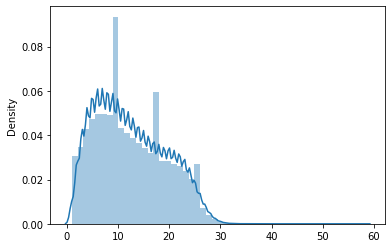

In [ ]:
# Estimating vocab size and max sequence length to allow in vectorization layer.
def tweet_length(tweet):
  return len([token for token in tweet.split()])

import seaborn as sns
tweet_lengths = [tweet_length(tweet) for tweet in train_tweets.tolist()]
sns.distplot(tweet_lengths)

In [37]:
unique_words = set([token for tweet in train_tweets for token in tweet.split()])
print("Total Unique Words:", len(unique_words))

# Counting Total Words and Stop Words
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
stop_words = stopwords.words("english")
total_words = [token for tweet in train_tweets for token in tweet.split()]
total_stop_words = [token for tweet in train_tweets for token in tweet.split() if token in stop_words]
print('Total Stop Words', len(total_words))
print('Total Stop Words', len(total_stop_words))
print('Ratio of Total Words to Total Stop Words:', len(total_words)/len(total_stop_words))

Total Unique Words: 75553
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
Total Stop Words 17861874
Total Stop Words 7690978
Ratio of Total Words to Total Stop Words: 2.322445077856158


In [7]:
def data_input_fn(texts, labels, batch_size=32, is_training=True):
  # Convert the inputs to a Dataset.
  dataset = tf.data.Dataset.from_tensor_slices((texts,labels))
  # Shuffle, repeat, and batch the examples.
  dataset = dataset.cache()
  if is_training:
    dataset = dataset.shuffle(1000, reshuffle_each_iteration=True)
    dataset = dataset.repeat()
  dataset = dataset.batch(batch_size, drop_remainder=True)
  # Return the dataset.
  return dataset

# Creating Vectorization Layer
max_features = 75000
max_len = 50

In [8]:
# Create Mdoel Func
def create_model():
  words = tf.keras.Input(shape=(1,), dtype=tf.string)
  vectors = vectorization_layer(words)
  embeddings = tf.keras.layers.Embedding(input_dim=max_features+1, output_dim=128)(vectors)
  output = tf.keras.layers.LSTM(256, return_sequences=True, name='LSTM_1')(embeddings)
  output = tf.keras.layers.LSTM(256, name='LSTM_2')(output)
  output = tf.keras.layers.Dropout(0.3)(output)
  output = tf.keras.layers.Dense(64, activation='relu', name='Dense_3')(output)
  output = tf.keras.layers.Dense(1,activation='sigmoid', name='Output')(output)

  model = tf.keras.models.Model(words,output)
  return model

# Data
training_dataset = data_input_fn(train_tweets, train_labels, batch_size=1024)
validation_dataset = data_input_fn(val_tweets, val_labels, batch_size=128, is_training=False)
test_dataset = data_input_fn(test.tweet, test.sentiment, batch_size=8, is_training=False)

In [ ]:
batch_size = 1024
epochs = 3
steps_per_epoch = train_tweets.shape[0] // batch_size

# For GPU Execution (Uncomment if executing on GPU/CPU)
vectorization_layer = tf.keras.layers.experimental.preprocessing.TextVectorization(
    max_tokens=max_features, output_sequence_length=max_len)
vectorization_layer.adapt(train_tweets.values)
model = create_model()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# For TPU execution (Uncomment if executing on TPU)
'''
import os
try:
 device_name = os.environ['COLAB_TPU_ADDR']
 TPU_ADDRESS = 'grpc://' + device_name
 print('Found TPU at: {}'.format(TPU_ADDRESS))
except KeyError:
 print('TPU not found')

resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
tf.config.experimental_connect_to_cluster(resolver)

# This is the TPU initialization code that has to be at the beginning.
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))
strategy = tf.distribute.experimental.TPUStrategy(resolver)

with strategy.scope():
  vectorization_layer = tf.keras.layers.experimental.preprocessing.TextVectorization(
    max_tokens=max_features, output_sequence_length=max_len)
  vectorization_layer.adapt(train_tweets.values)
  model = create_model()
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
'''

# Fitting the model
model.fit(training_dataset, epochs=epochs, batch_size=batch_size, 
          steps_per_epoch=steps_per_epoch, validation_data=validation_dataset)

Epoch 1/3
1402/1402 [==============================] - 288s 199ms/step - loss: 0.4545 - accuracy: 0.7738 - val_loss: 0.3984 - val_accuracy: 0.8193
Epoch 2/3
1402/1402 [==============================] - 283s 202ms/step - loss: 0.3814 - accuracy: 0.8293 - val_loss: 0.3966 - val_accuracy: 0.8224
Epoch 3/3
1402/1402 [==============================] - 283s 202ms/step - loss: 0.3509 - accuracy: 0.8455 - val_loss: 0.4079 - val_accuracy: 0.8202


In [7]:
# Saving Model
import os
MODEL_DIR = "/content/drive/MyDrive/TextSummarizerModel/SentimentAnalysis/Model"
version = 1
export_path = os.path.join(MODEL_DIR, str(version))
print('export_path = {}\n'.format(export_path))

# tf.keras.models.save_model(
#     model,
#     export_path,
#     overwrite=True,
#     include_optimizer=True,
#     save_format=None,
#     signatures=None,
#     options=None
# )

print('\nSaved model:')
!ls -l {export_path}

export_path = /content/drive/MyDrive/TextSummarizerModel/SentimentAnalysis/Model/1


Saved model:
total 1846
drwx------ 2 root root    4096 Jul 18 11:12 assets
-rw------- 1 root root   20942 Jul 18 11:12 keras_metadata.pb
-rw------- 1 root root 1860568 Jul 18 11:12 saved_model.pb
drwx------ 2 root root    4096 Jul 18 11:12 variables


In [13]:
!saved_model_cli show --dir {export_path} --all


MetaGraphDef with tag-set: 'serve' contains the following SignatureDefs:

signature_def['__saved_model_init_op']:
  The given SavedModel SignatureDef contains the following input(s):
  The given SavedModel SignatureDef contains the following output(s):
    outputs['__saved_model_init_op'] tensor_info:
        dtype: DT_INVALID
        shape: unknown_rank
        name: NoOp
  Method name is: 

signature_def['serving_default']:
  The given SavedModel SignatureDef contains the following input(s):
    inputs['input_1'] tensor_info:
        dtype: DT_STRING
        shape: (-1, 1)
        name: serving_default_input_1:0
  The given SavedModel SignatureDef contains the following output(s):
    outputs['Output'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 1)
        name: StatefulPartitionedCall:0
  Method name is: tensorflow/serving/predict
W0725 07:12:44.656505 139642937780096 deprecation.py:506] From /usr/local/lib/python2.7/dist-packages/tensorflow_core/python/ops/resource_va

In [8]:
# Loading and Evaluation of Model
model = tf.keras.models.load_model(export_path)
#model.evaluate(test_dataset)

NameError: ignored

In [4]:
# Updating apt repo for tensorflow-model-server
!echo "deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | tee /etc/apt/sources.list.d/tensorflow-serving.list && \
curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | apt-key add -
!apt-get update

deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2943  100  2943    0     0  36333      0 --:--:-- --:--:-- --:--:-- 36333
OK
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:2 http://storage.googleapis.com/tensorflow-serving-apt stable InRelease [3,012 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.

In [5]:
# Installing Tensorflow Model Server
!apt-get update && apt-get install tensorflow-model-server

Hit:1 http://storage.googleapis.com/tensorflow-serving-apt stable InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:9 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:13 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:14 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic 

In [9]:
# Setting Env Variable Model Path
os.environ["MODEL_DIR"] = MODEL_DIR

In [10]:
%%bash --bg
nohup tensorflow_model_server \
  --rest_api_port=8501 \
  --model_name=sample_model \
  --model_base_path="${MODEL_DIR}" >server.log 2>&1

Starting job # 0 in a separate thread.


In [11]:
!tail server.log

2021-07-25 09:05:10.952573: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:190] Running initialization op on SavedModel bundle at path: /content/drive/MyDrive/TextSummarizerModel/SentimentAnalysis/Model/1
2021-07-25 09:05:11.023613: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:277] SavedModel load for tags { serve }; Status: success: OK. Took 501501 microseconds.
2021-07-25 09:05:11.036158: I tensorflow_serving/servables/tensorflow/saved_model_warmup_util.cc:59] No warmup data file found at /content/drive/MyDrive/TextSummarizerModel/SentimentAnalysis/Model/1/assets.extra/tf_serving_warmup_requests
2021-07-25 09:05:11.041218: I tensorflow_serving/core/loader_harness.cc:87] Successfully loaded servable version {name: sample_model version: 1}
2021-07-25 09:05:11.042529: I tensorflow_serving/model_servers/server_core.cc:486] Finished adding/updating models
2021-07-25 09:05:11.042592: I tensorflow_serving/model_servers/server.cc:367] Profiler service is enabl

In [14]:
# Testing the API
import json
from pprint import pprint
instances = [
            ['The dinner was ok.'],
             ['I really hated the dinner.'],
             ['That was a really great movie, we should definitely consider watching it again.'],
             ["We've been using this for a long time and it's a really good one but the handle is not that great. Only use if you don't want to move it around much."],
]
data = json.dumps({"signature_name": "serving_default", "instances": instances})
pprint('Data: {}'.format(data))

('Data: {"signature_name": "serving_default", "instances": [["The dinner was '
 'ok."], ["I really hated the dinner."], ["That was a really great movie, we '
 'should definitely consider watching it again."], ["We\'ve been using this '
 "for a long time and it's a really good one but the handle is not that great. "
 'Only use if you don\'t want to move it around much."]]}')


In [13]:
import requests
headers = {"content-type": "application/json"}
json_response = requests.post('http://localhost:8501/v1/models/sample_model:predict', data=data, headers=headers)
predictions = json.loads(json_response.text)
print(predictions)

{'predictions': [[0.762461543], [0.0516885221], [0.976486802], [0.567632318]]}
